In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 3 * n 그래프를 그려주는 함수
def plot_3_by_n(df, feature_lst, row):

    fig, axes = plt.subplots(row, 3, figsize=(12,12))
    
    #  feature_lst 목록 순회후 히스토그램 그리기 
    for n, feature in enumerate(feature_lst):

        sns.histplot(df[feature], bins=30,  ax=axes[n // 3, n % 3])
        axes[n // 3, n % 3].set_title(feature + " Distribute")  # subplot 제목 설정

    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    plt.show()

In [3]:
df = pd.read_csv("./loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
'''
loan_id: 대출 ID (고유 식별자)
no_of_dependents: 부양 가족의 수
education: 교육 수준
self_employed: 자영업 여부
income_annum: 연간 소득
loan_amount: 대출 금액
loan_term: 대출 기간 (일 수 등)
cibil_score: CIBIL 신용 점수
residential_assets_value: 주택 자산 가치 (본인 소유 부동산으로 추정)
commercial_assets_value: 상업용 자산 가치 (공장, 상가, 사무실 빌딩)
luxury_assets_value: 고급 자산 가치 (고급 차량, 보석, 고가의 예술 작품)
bank_asset_value: 은행 자산 가치
loan_status: 대출 상태 (예: 'Approved', 'Rejected' 등)
'''

"\nloan_id: 대출 ID (고유 식별자)\nno_of_dependents: 부양 가족의 수\neducation: 교육 수준\nself_employed: 자영업 여부\nincome_annum: 연간 소득\nloan_amount: 대출 금액\nloan_term: 대출 기간 (일 수 등)\ncibil_score: CIBIL 신용 점수\nresidential_assets_value: 주택 자산 가치 (본인 소유 부동산으로 추정)\ncommercial_assets_value: 상업용 자산 가치 (공장, 상가, 사무실 빌딩)\nluxury_assets_value: 고급 자산 가치 (고급 차량, 보석, 고가의 예술 작품)\nbank_asset_value: 은행 자산 가치\nloan_status: 대출 상태 (예: 'Approved', 'Rejected' 등)\n"

In [6]:
# 결측치 없음

df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
# y label 의 데이터 불균형 문제는 없음

df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [11]:
# loan_id 가 겹치는 경우는 없음

df[df['loan_id'].duplicated(keep = False) == True]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [12]:
# df 컬럼 중 일부가 띄어쓰기가 되어있음

df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
# 컬럼 명에서 불필요한 띄어쓰기 제거 및 loan_id 제거

df.columns = df.columns.str.replace(' ', '')
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.drop(['loan_id'], axis=1)

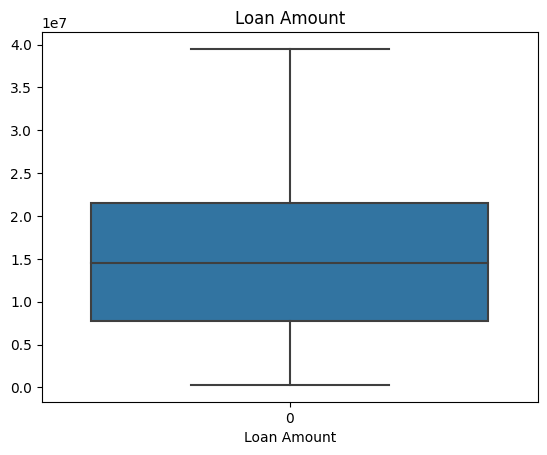

In [15]:

# outlier 보이지 않음

sns.boxplot(df['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

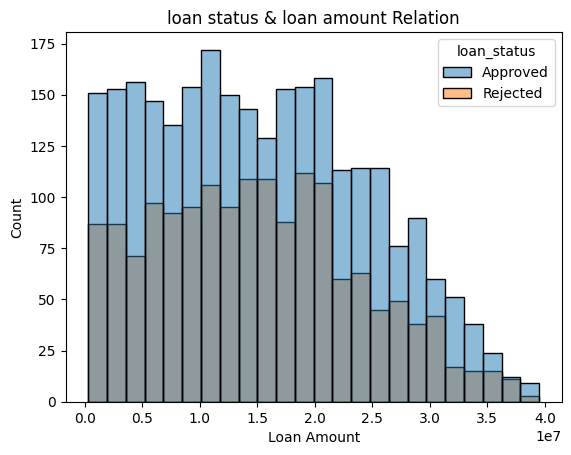

In [16]:
# loan amount 와 y label(loan status) 관계
# 대체로 loan Approved 인 경우 대출 금액이 많았고, Reject 인 경우 대출을 적게 해줌
# 대출 금액에 따른 Approved, Rejected 데이터의 그래프 양상이 거의 유사함 -> y label 과의 큰 관계가 보이질 않음

sns.histplot(df, x='loan_amount', hue='loan_status')
plt.title("loan status & loan amount Relation")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

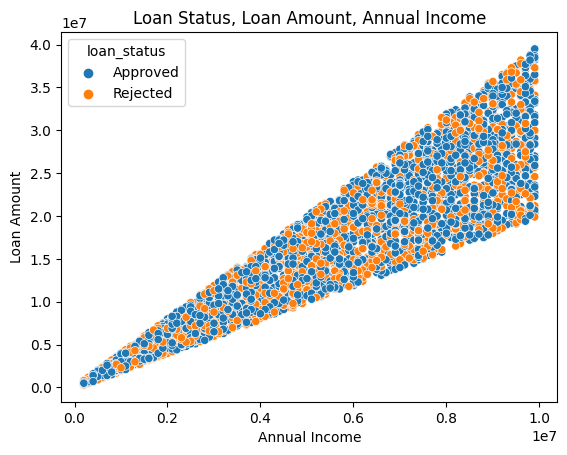

In [17]:
# 연간 소득과 대출 금액과의 관계
# 연간 소득이 높을 수록 대출 금액이 증가하는 양의 상관 관계를 알 수 있음
# 즉, 은행에서 상환 능력을 고려해서 소득이 높은 사람들에게 더 많은 대출을 해준다는 것을 알 수 있음
# 소득이 높은 경우 적은 대출이 Reject 되는 경향이 일부 보임 (오른쪽 아래 & 오른 쪽 위 참고)
# 하지만 이들이 y label 과의 관계는 없어 보임 (Approved 와 Reject 가 골고루 퍼져있음)

sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

In [18]:
# 연간 소득이 가장 높은데 대출을 거부 당한 사례
# 신용 점수가 (cibil_score) 낮음.
# 참고로 cibil_score rate: 300-499 -> Poor / 500-649 -> Average / 650-749 -> Good / 750-900 -> Excellent
# cibil_score 범위가 대부분 300 ~ 500 사이에 있음 
# 즉, 연간 소득이 높지만 신용 점수가 낮아서 거래가 거부 당한 것임.
# 연간 소득이 높으면 낲은 금액의 대출이 불가능한 것이 아님.

df.loc[(df['income_annum'] == df['income_annum'].max()) & (df['loan_status'] =='Rejected')]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
82,2,Not Graduate,Yes,9900000,21200000,16,363,25500000,11400000,26600000,6800000,Rejected
157,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
1179,5,Graduate,No,9900000,35700000,10,392,7900000,4300000,39200000,13000000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1409,3,Graduate,Yes,9900000,29900000,20,490,10500000,9100000,27100000,7400000,Rejected
1547,1,Graduate,Yes,9900000,34100000,14,371,24400000,7100000,29300000,6200000,Rejected
1890,5,Graduate,No,9900000,24600000,2,530,24200000,12800000,20400000,13000000,Rejected
2862,4,Graduate,No,9900000,30000000,18,496,10400000,8000000,29300000,13800000,Rejected
2869,4,Graduate,No,9900000,26100000,2,481,14500000,5000000,23600000,9300000,Rejected
3000,1,Not Graduate,Yes,9900000,25700000,2,340,15600000,18800000,29500000,11800000,Rejected


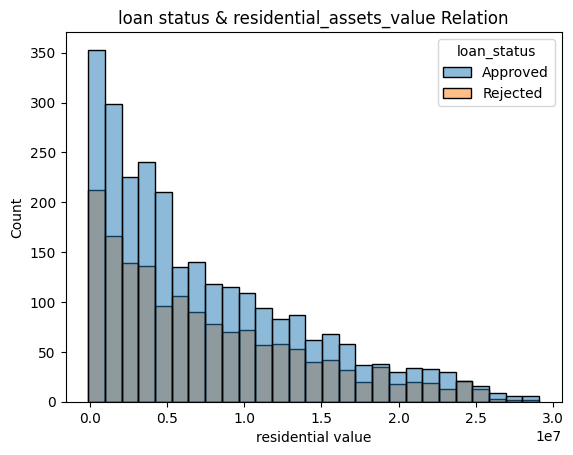

In [20]:
# 주택 담보 대출은 말 그대로 나의 주택을 담보로 돈을 대출하는 것임.
# 따라서 비싼 주택을 소유한 사람은 상대적으로 Approved 확률이 높지 않을까 생각. -> but X

sns.histplot(df, x='residential_assets_value', hue='loan_status')
plt.title("loan status & residential_assets_value Relation")
plt.xlabel("residential value")
plt.ylabel("Count")
plt.show()

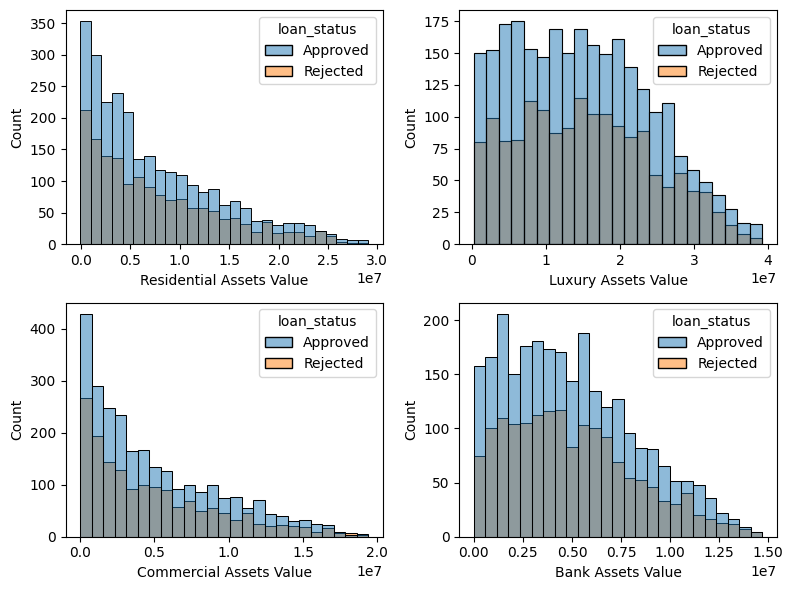

In [22]:
# 주택 담보 대출은 말 그대로 나의 주택을 담보로 돈을 대출하는 것임.
# 따라서 비싼 주택을 소유한 사람은 상대적으로 Approved 확률이 높지 않을까 생각 -> X
# 은행 자산 가치가 높을 수록 상대적으로 더 Approved 를 더 잘해 줄 것이라고 판단 -> X


fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(df, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

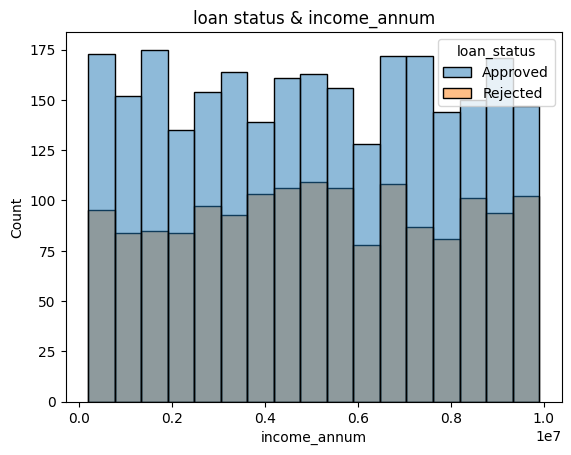

In [26]:


# 주택 담보 대출은 말 그대로 나의 주택을 담보로 돈을 대출하는 것임.
# 따라서 비싼 주택을 소유한 사람은 상대적으로 Approved 확률이 높지 않을까 생각. -> but X

sns.histplot(df, x='income_annum', hue='loan_status')
plt.title("loan status & income_annum")
plt.xlabel("income_annum")
plt.ylabel("Count")
plt.show()

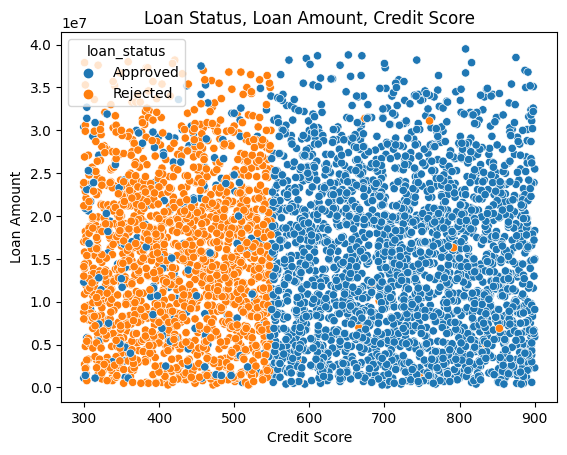

In [23]:
# 신용 점수와 y label 관계
# 신용 점수가 550 정도를 기점으로 대출 승인, 거절이 구분이 됨 -> 모델 정확도가 높을 수밖에 없을 것임
# 이 중 신용 점수가 높지만 대출이 불가능한 데이터와 반대로 신용점수가 낮지만 대출한 경우의 데이터를 잘 예측하는 것이 과제 
# 추가적으로 신용 점수가 낮을 때 승인이 되었을 때 그 승인된 요인을 파악할 필요가 있음

sns.scatterplot(x=df['cibil_score'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

In [24]:
# 신용 점수가 높은데 대출을 못받은 경우: 뚜렷한 특징이 보이지 않음

df.loc[(df['cibil_score'] > 700) & (df['loan_status'] =='Rejected')].sort_values(['cibil_score'], ascending= False)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
3527,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
911,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
236,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
4099,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected
1446,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected


In [25]:
# 신용 점수가 낮은데 대출을 받은 경우:
# 185개 레코드, 이에 대해 알아볼 예정,
df.loc[(df['cibil_score'] < 550) & (df['loan_status'] =='Approved')].sort_values(['cibil_score'], ascending= False)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1220,0,Graduate,Yes,9000000,34000000,4,549,2000000,8900000,20000000,12400000,Approved
3553,5,Graduate,No,1800000,6000000,4,548,1400000,2400000,6500000,2600000,Approved
10,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved
1663,1,Not Graduate,No,1000000,3600000,4,546,2500000,0,2600000,500000,Approved
231,2,Graduate,No,9800000,32400000,2,543,24200000,17500000,25700000,7700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2,Graduate,No,6900000,20900000,2,302,18700000,10700000,26900000,9200000,Approved
2920,1,Not Graduate,No,400000,1400000,4,302,200000,100000,1500000,500000,Approved
2798,0,Graduate,No,3600000,12300000,2,300,5200000,3000000,14300000,5400000,Approved
95,5,Graduate,No,300000,1100000,2,300,100000,500000,700000,400000,Approved


In [26]:
loan_asset = df[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_status']]
loan_asset_corr = loan_asset.corr()

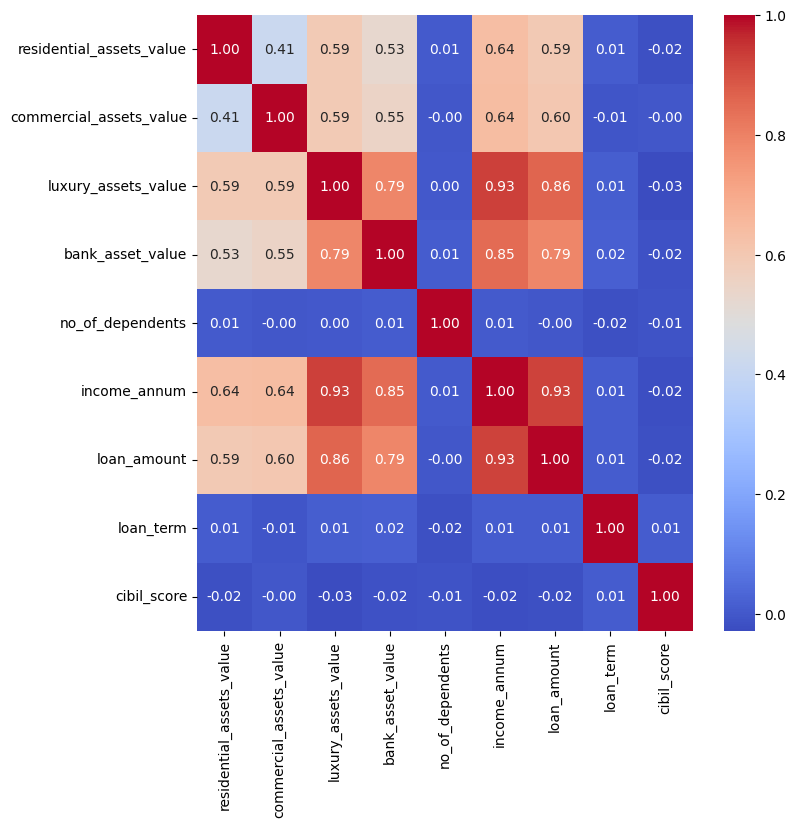

In [27]:
# 정수형 변수에 대한 heatmap
# 연간 소득은 은행 자산, 사치품 자산등과 높은 양의 상관관계를 가지고 있음
# 주거용 자산과 상업용 자산은 은행, 사치품 자산에 비해서는 조금 더 낮은 상관성을 가짐
# 이유: 상업용 자산은 business 와 관련된 자산으로써 개인이 수입이 많은 회사원이라면 상업용 자산은 없을 것이다.
# 주거용 자산은 (부동산) 사람의 가치관에 따라서 가변적이라고 판단됨.
# 어떤 사람은 돈 많은데 지방에 살고, 어떤 사람은 돈이 많지 않은데 서울에 사는 경우 

plt.figure(figsize=(8,8))
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [32]:
# loan_term은 다른 변수와의 상관관계가 적음. 따라서 직접 y label 과의 관계를 살펴봄.
# loan_term이 짧을 수록 대출 승인 확률이 높음
# 그리고 loan_term이 길 수록 승인 확률이 낮음

cross_loan_term = pd.crosstab(index=df['loan_term'], columns=df['loan_status'])
cross_loan_term['Total'] = cross_loan_term['Approved'] + cross_loan_term['Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term['Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term['Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status,Approved,Rejected,Total,Approved_percentage,Rejected_percentage
loan_term,,,,,
2,315,89,404,77.970297,22.029703
4,366,81,447,81.879195,18.120805
6,282,208,490,57.551020,42.448980
8,220,166,386,56.994819,43.005181
10,229,207,436,52.522936,47.477064
12,276,180,456,60.526316,39.473684
14,239,166,405,59.012346,40.987654
16,236,176,412,57.281553,42.718447
18,257,165,422,60.900474,39.099526


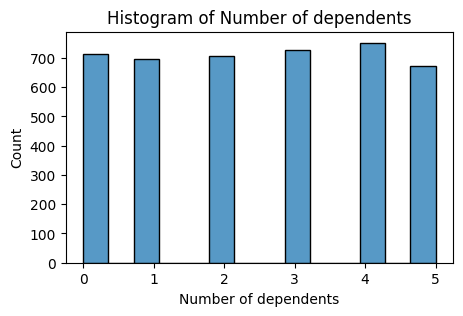

In [33]:
# 부양 가족의 수

plt.figure(figsize = (5,3))
sns.histplot(df['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

In [9]:
# 부양 가족 수에 따른 대출 승인, 거부 퍼센트
# 부양 가족수에 상관 없이 대체로 60% 정도 대출 승인을 받음

cross_dependents = pd.crosstab(index=df['no_of_dependents'], columns=df['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents['Approved']/(cross_dependents['Approved'] + cross_dependents['Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents['Rejected']/(cross_dependents['Approved'] + cross_dependents['Rejected'])) * 100
cross_dependents

loan_status,Approved,Rejected,Approved_percentage,Rejected_percentage
no_of_dependents,,,,
0,457,255,64.185393,35.814607
1,430,267,61.692970,38.307030
2,441,267,62.288136,37.711864
3,457,270,62.861073,37.138927
4,465,287,61.835106,38.164894
5,406,267,60.326895,39.673105


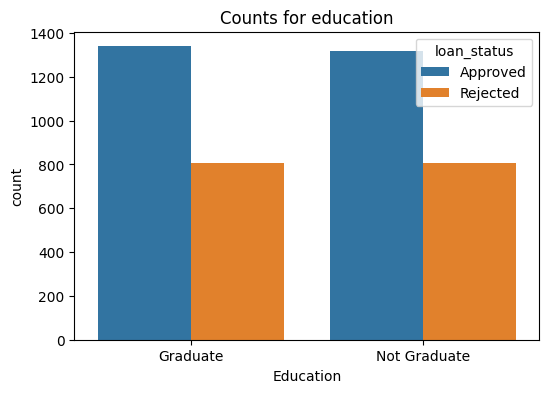

In [36]:
# 학교 졸업 여부가 대출 승인 여부에 큰 영향을 끼치지는 않음

plt.figure(figsize = (6,4))
sns.countplot(x=df['education'], hue=df['loan_status'])
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

In [37]:
# 학교 졸업 한 사람, 졸업하지 않은 사람들에 대해서 비교 하는 지표
# 전체적인 스케일이 유사함
# 그래서 졸업 여부와 상관없이 대출 승인, 거절 비율이 비슷한 것 같음 

education = df.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

education

,education,count_by_education,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,Graduate,2144,5100000.0,15229151.12,599.14,10.85,7543376.87,4943610.07,15239319.03,5007182.84
1,Not Graduate,2125,5000000.0,15036894.12,600.74,10.95,7401223.53,5002964.71,15012282.35,4945929.41


In [38]:
# 동일한 방법으로 자영업 여부에 따른 차이를 보고자 함.
# 대부분의 스케일이 유사함.

self_employed = df.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

self_employed

,self_employed,count,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,No,2119,5100000.0,15120245.40,600.78,10.88,7432373.76,5052713.54,15085842.38,4977395.0
1,Yes,2150,5100000.0,15146465.12,599.10,10.92,7512279.07,4894744.19,15166186.05,4976000.0


### 신용등급이 550이하일 때, 대출이 승인된 경우에 대한 EDA

<Axes: xlabel='cibil_score', ylabel='Count'>

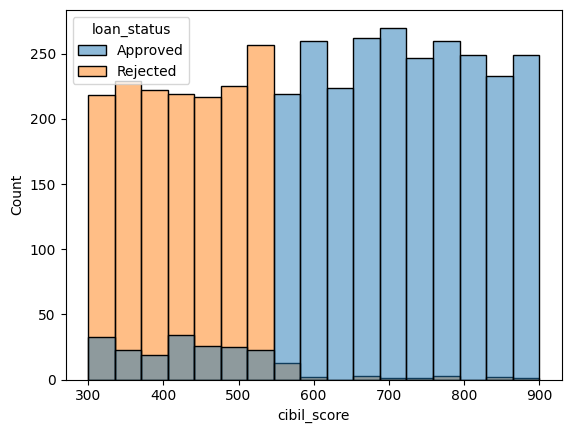

In [39]:
#신용등급 550을 경계로 나뉨
#신용 등급이 550이하일때 승인된 경우가 꽤 있음.
sns.histplot(df, x = 'cibil_score', hue = 'loan_status')

<Axes: xlabel='cibil_score', ylabel='Count'>

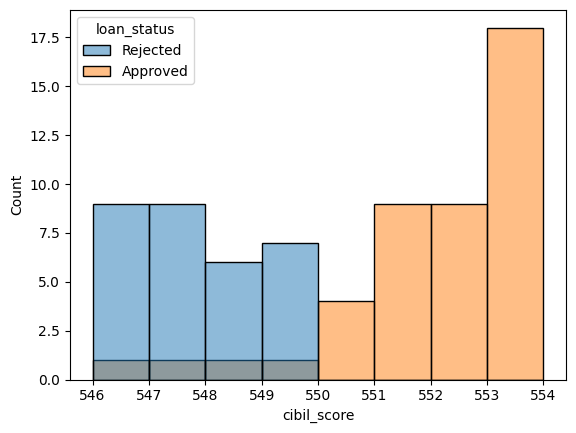

In [41]:
#정확한 경계를 보기 위한 히스토그램 

df_cibil_between = df.loc[(df['cibil_score'] > 545) & (df['cibil_score'] < 555)]
df_cibil_between = df_cibil_between[['cibil_score','loan_status']].sort_values(by='cibil_score')

sns.histplot(df_cibil_between, x = 'cibil_score', hue = 'loan_status')

In [8]:
#신용둥급 550이하인 것만 추출
cibil_under_550=df.loc[(df['cibil_score'] < 500)]

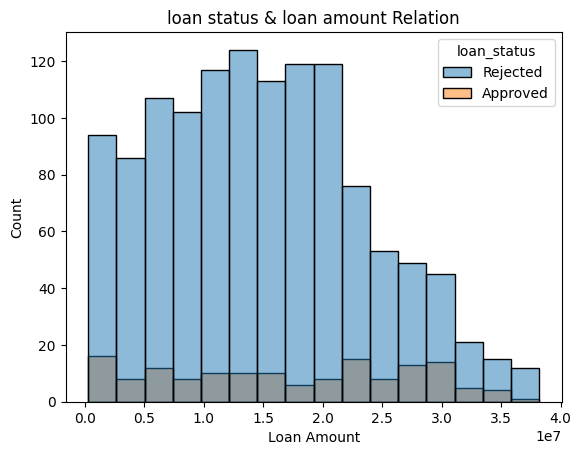

In [43]:
#신용등급 550이하였던 사람들만 추출했을때, 대출신청량과 승인여부의 관계
#특별히 눈에 띄는건 없음
sns.histplot(cibil_under_550, x='loan_amount', hue='loan_status')
plt.title("loan status & loan amount Relation")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

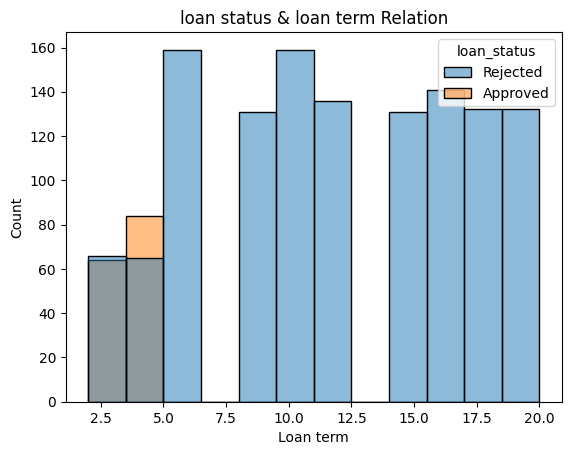

In [44]:
#대출 기간과 승인여부의 관계
#대출기간이 5년 이상이면 전부 거절해버린 모습
#또한 대출기간이 5년 이하일때도 거절된 경우도 있음 이에 대해 더 알아보고자 함.
sns.histplot(cibil_under_550, x='loan_term', hue='loan_status')
plt.title("loan status & loan term Relation")
plt.xlabel("Loan term")
plt.ylabel("Count")
plt.show()

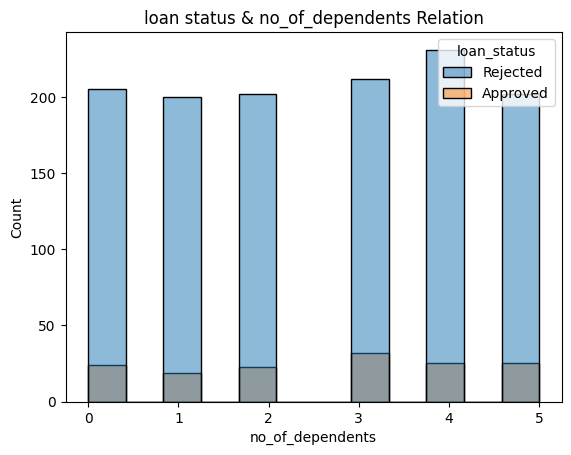

In [45]:
#부양가족수와의 관계
sns.histplot(cibil_under_550, x='no_of_dependents', hue='loan_status')
plt.title("loan status & no_of_dependents Relation")
plt.xlabel("no_of_dependents")
plt.ylabel("Count")
plt.show()

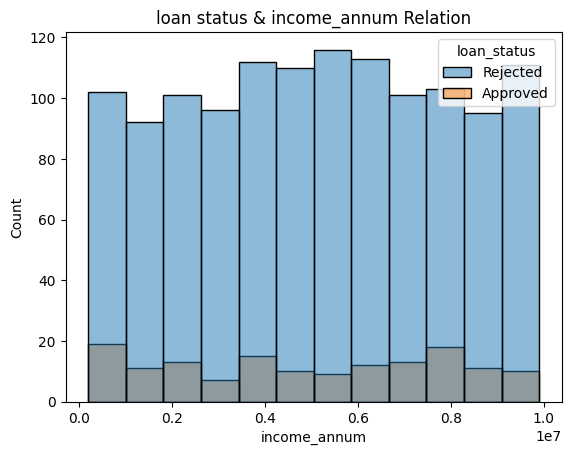

In [46]:
#연수입과의 관계
sns.histplot(cibil_under_550, x='income_annum', hue='loan_status')
plt.title("loan status & income_annum Relation")
plt.xlabel("income_annum")
plt.ylabel("Count")
plt.show()

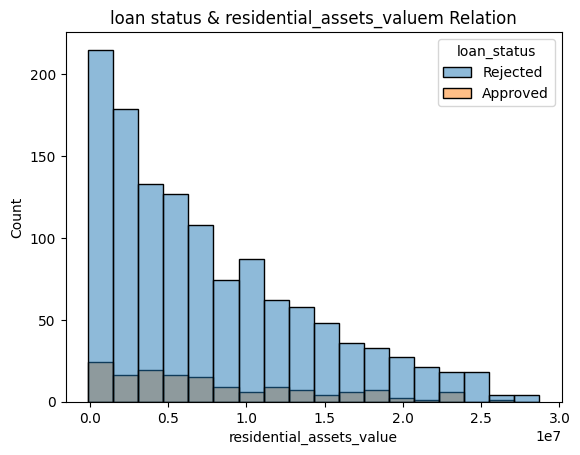

In [47]:
#주거자산과의 관계
sns.histplot(cibil_under_550, x='residential_assets_value', hue='loan_status')
plt.title("loan status & residential_assets_valuem Relation")
plt.xlabel("residential_assets_value")
plt.ylabel("Count")
plt.show()

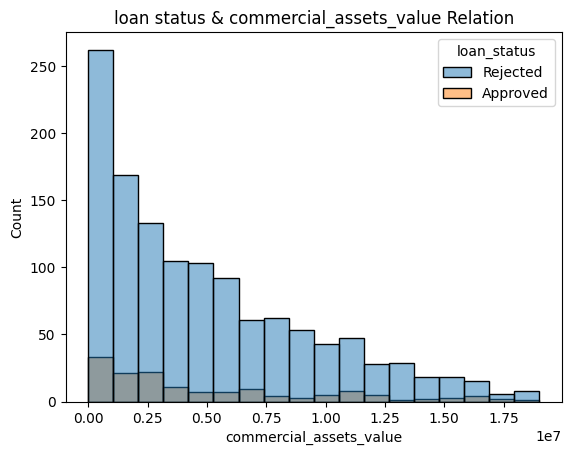

In [48]:
# 투자자산과의 관계
sns.histplot(cibil_under_550, x='commercial_assets_value', hue='loan_status')
plt.title("loan status & commercial_assets_value Relation")
plt.xlabel("commercial_assets_value")
plt.ylabel("Count")
plt.show()

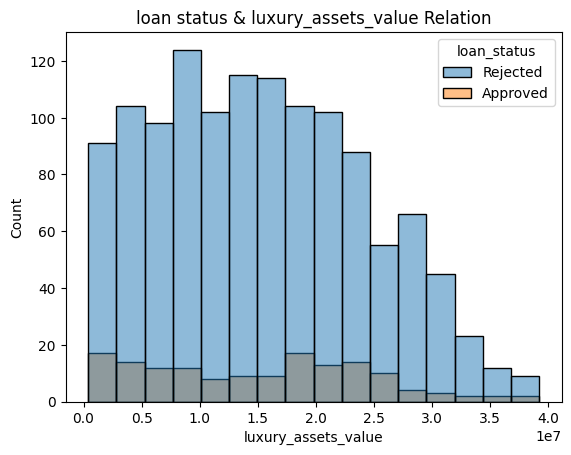

In [49]:
#사치자산과의 관계
sns.histplot(cibil_under_550, x='luxury_assets_value', hue='loan_status')
plt.title("loan status & luxury_assets_value Relation")
plt.xlabel("luxury_assets_value")
plt.ylabel("Count")
plt.show()

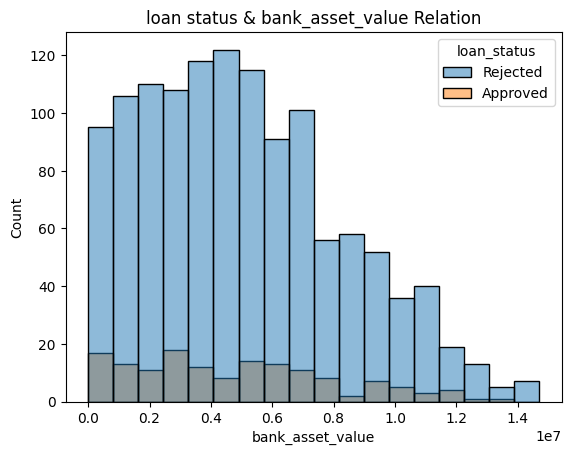

In [50]:
#은행자산과의 관계
sns.histplot(cibil_under_550, x='bank_asset_value', hue='loan_status')
plt.title("loan status & bank_asset_value Relation")
plt.xlabel("bank_asset_value")
plt.ylabel("Count")
plt.show()

### 신용점수 550 이하의 경우엔 승인여부가 loan_term에 의해 결정됨

In [51]:
# 신용점수 550이하이고, 대출기간이 5년 이하인 경우만 추출
cibil_under_550_loanTerm_under_5=cibil_under_550.loc[(df['loan_term'] < 5)]
cibil_under_550_loanTerm_under_5

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
71,5,Graduate,Yes,5300000,18600000,4,386,2700000,9700000,11900000,4200000,Approved
72,5,Not Graduate,No,7000000,18300000,4,418,18400000,11700000,21500000,7600000,Rejected
80,4,Graduate,No,3500000,8900000,4,470,1300000,2200000,12300000,2000000,Rejected
95,5,Graduate,No,300000,1100000,2,300,100000,500000,700000,400000,Approved
152,1,Graduate,Yes,6500000,20600000,2,306,15900000,1900000,18100000,3200000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...
4217,5,Not Graduate,Yes,400000,1400000,4,483,1100000,700000,800000,100000,Approved
4227,4,Graduate,Yes,400000,1400000,2,496,400000,200000,1100000,400000,Approved
4238,0,Not Graduate,No,2200000,7500000,2,333,3400000,600000,6200000,1500000,Approved
4248,4,Graduate,Yes,5300000,14500000,4,352,12600000,4900000,10500000,3500000,Rejected


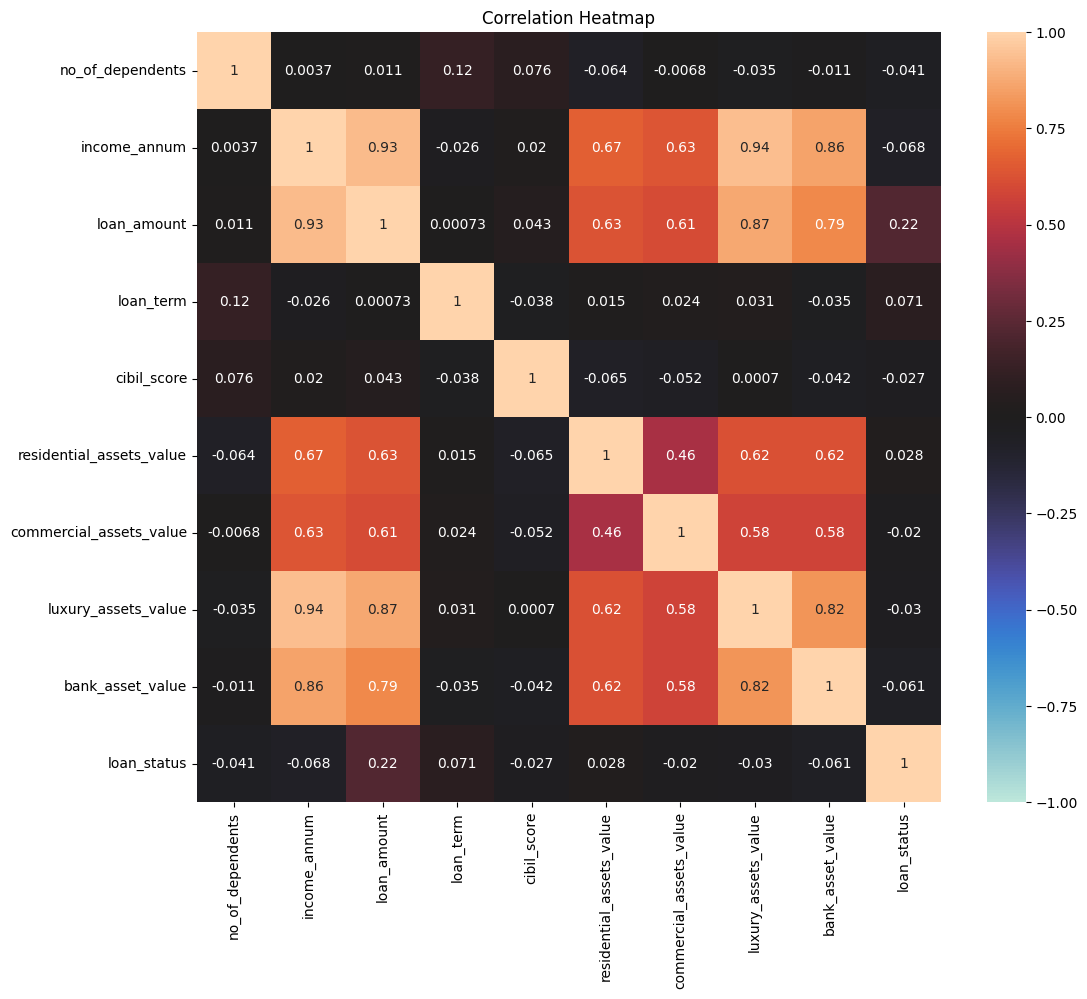

In [52]:
#loan_amount와 승인여부의 관계성이 보임

cibil_under_550_loanTerm_under_5
a = cibil_under_550_loanTerm_under_5.copy()
a['loan_status'] = cibil_under_550_loanTerm_under_5['loan_status'].map({'Approved': 1, 'Rejected': 0})

plt.figure(figsize=(12, 10))
correlation_matrix = a.corr()
sns.heatmap(correlation_matrix,vmin= -1 ,center=0, vmax = 1,annot=True)
plt.title('Correlation Heatmap')
plt.show()

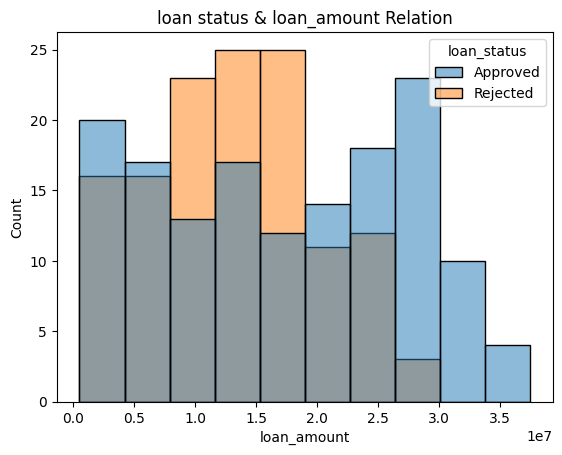

In [53]:
# 잘모르겠음. loan_amount가 2.5이상될때 approved된게 많아졌지만, 

sns.histplot(cibil_under_550_loanTerm_under_5, x='loan_amount', hue='loan_status')
plt.title("loan status & loan_amount Relation")
plt.xlabel("loan_amount")
plt.ylabel("Count")
plt.show()

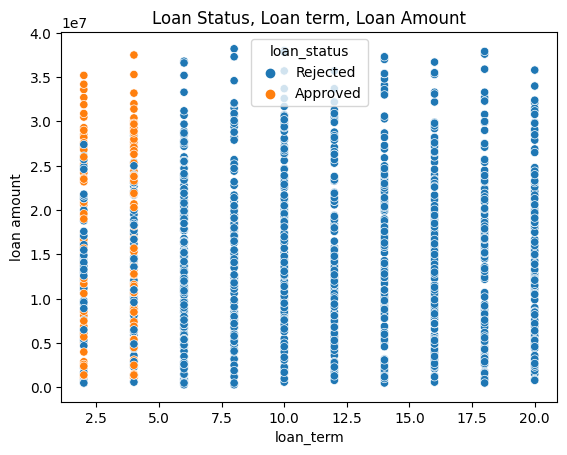

In [54]:
#신용등급 550이하인 경우에서의 loanterm과 loan amount가 대출승인에 미치는 영향
# 전부 신용등급이 550이하인 경우임.
# 대출기간이 5년 이상이면 전부 거절하고, 5년이하이고, 대출 신청량이  25,000,000이상일때, 대부분 승인됨
# 대출기간이 5년 이상이고, 대출 신청량이 30,000,000이상일때 전부 승인
sns.scatterplot(x=cibil_under_550['loan_term'], y= cibil_under_550['loan_amount'], hue=cibil_under_550['loan_status'])
plt.title("Loan Status, Loan term, Loan Amount")
plt.xlabel("loan_term")
plt.ylabel("loan amount")
plt.show()

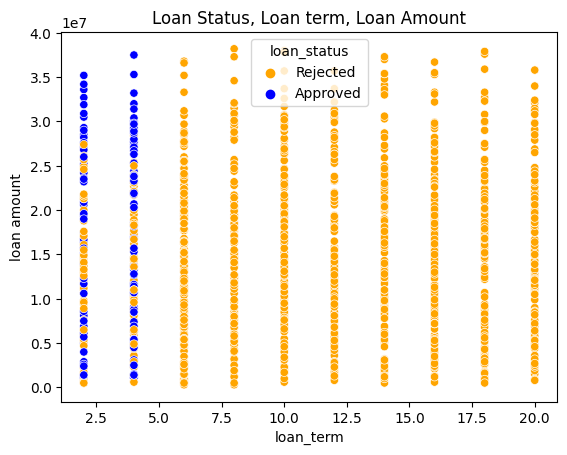

In [12]:
#hue색이 바뀌어서 헷갈릴수 있어 색 바꿈

palette_colors = {'Approved': 'blue', 'Rejected': 'orange'}  # '승인'과 '거절'은 cibil_under_550['loan_status'] 열의 고유값
sns.scatterplot(
    x='loan_term', 
    y='loan_amount', 
    hue='loan_status', 
    data=cibil_under_550, 
    palette=palette_colors
)
plt.title("Loan Status, Loan term, Loan Amount")
plt.xlabel("loan_term")
plt.ylabel("loan amount")
plt.show()